In [10]:
import warnings
import pandas as pd
import numpy as np
import pandas_profiling
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
%matplotlib inline

In [11]:
application_train = pd.read_csv(r'd:\NEU\Credit-Risk-Analysis\data\dseb-63-data-preparation-final-project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv')
application_test = pd.read_csv(r'd:\NEU\Credit-Risk-Analysis\data\dseb-63-data-preparation-final-project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_test.csv')
prev_app = pd.read_csv(r'd:\NEU\Credit-Risk-Analysis\data\dseb-63-data-preparation-final-project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_previous_application.csv')
#prev_app_profile = prev_app.profile_report(title="Previous Application dataset report")
#prev_app_profile

In [12]:
print(f'The shape of previous_application.csv is: {prev_app.shape}')
print(f'Number of unique SK_ID_PREV in previous_application.csv are: {len(prev_app.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in previous_application.csv are: {len(prev_app.SK_ID_CURR.unique())}')
print(f'Number of overlapping SK_ID_CURR in application_train.csv and previous_application.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(prev_app.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in application_test.csv and previous_application.csv are: {len(set(application_test.SK_ID_CURR.unique()).intersection(set(prev_app.SK_ID_CURR.unique())))}')
print(f'Number of duplicate values in previous_application: {prev_app.shape[0] - prev_app.duplicated().shape[0]}')


The shape of previous_application.csv is: (1413701, 37)
Number of unique SK_ID_PREV in previous_application.csv are: 1413701
Number of unique SK_ID_CURR in previous_application.csv are: 291057
Number of overlapping SK_ID_CURR in application_train.csv and previous_application.csv are: 232826
Number of overlapping SK_ID_CURR in application_test.csv and previous_application.csv are: 58231
Number of duplicate values in previous_application: 0


In [13]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

check_missed_values(prev_app)

,Feature,Percentage
0,RATE_INTEREST_PRIMARY,99.661102
1,RATE_INTEREST_PRIVILEGED,99.661102
2,AMT_DOWN_PAYMENT,53.019698
3,RATE_DOWN_PAYMENT,53.019698
4,NAME_TYPE_SUITE,49.138538
5,DAYS_FIRST_DRAWING,39.690571
6,DAYS_FIRST_DUE,39.690571
7,DAYS_LAST_DUE_1ST_VERSION,39.690571
8,DAYS_LAST_DUE,39.690571
9,DAYS_TERMINATION,39.690571


Number of columns having NaN values: 16 columns


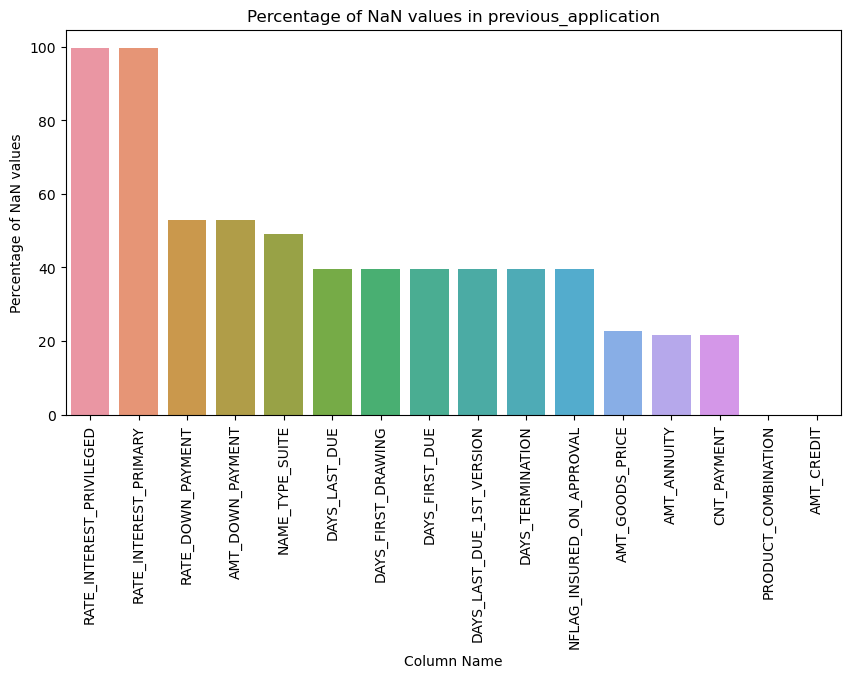

In [14]:
nan_df_prev_app = nan_df_create(prev_app)
plot_nan_percent(nan_df_prev_app, 'previous_application', tight_layout = False, figsize = (10,5))

#### OBSERVATION from previous_application.csv

- There are ~1670214 observations with 37 features list below:

    - SK_ID_PREV: (id của previous loan)
    - SK_ID_CURR: (id của current loan)
    - NAME_CONTRACT_TYPE: (loại hình của khoản vay)
    - AMT_ANNUITY: (trái phiếu đồng niên)
    - AMT_APPLICATION: (số tiền đăng kí vay)
    - AMT_CREDIT: (số tiền thực sự nhận được)
    - AMT_DOWN_PAYMENT: (tiền trả trước, tiền đặt cọc)
    - AMT_GOODS_PRICE: (giá của sản phẩm của lần vay trước)
    - WEEKDAY_APPR_PROCESS_START: (ngày đăng kí)
    - HOUR_APPR_PROCESS_START: (giờ đăng kí)
    - FLAG_LAST_APPL_PER_CONTRACT: (đánh dấu dòng là application cuối dùng của contract cho vay, đôi khi có nhiều application cho 1  contract vay)
    - NFLAG_LAST_APPL_IN_DAY: (đánh dấu dòng là application cuối cùng trong ngày của khách, đôi khi khách apply nhiều lần trong 1 ngày)
    - NFLAG_MICRO_CASH: (đánh dấu là vay tài chính vi mô)
    - RATE_DOWN_PAYMENT: (tỉ lệ tiền đặt cọc (normalized))
    - RATE_INTEREST_PRIMARY: (tỉ lệ lãi xuất chính (normalized))
    - ATE_INTEREST_PRIVILEGED: ( tỉ lệ lãi xuất ưu tiên (normalized))
    - NAME_CASH_LOAN_PURPOSE: (mục đích vay)
    - NAME_CONTRACT_STATUS: (tình trạng của hợp đồng (approved, cancelled, ...))
    - DAYS_DECISION: Relative to current application when was the decision about previous application made
    - NAME_PAYMENT_TYPE: (cách khách hàng trả tiền cho khoảng nợ cũ)
    - CODE_REJECT_REASON: (lý do chính khi bị từ chối cho vay)
    - NAME_TYPE_SUITE: (người đi cùng với khách hàng khi apply vay)
    - NAME_CLIENT_TYPE: (phân loại người vay mới hay cũ)
    - NAME_GOODS_CATEGORY: (thể loại sản phẩm mà khách hàng apply vay để mua)
    - NAME_PORTFOLIO: (loại hình vay)
    - NAME_PRODUCT_TYPE: (khoản vay cũ được bán chéo hay khách hàng randomly vào vay)
    - CHANNEL_TYPE: (có được khách thông qua kênh nào)
    - SELLERPLACE_AREA: (khu vực bán của lần apply trước)
    - NAME_SELLER_INDUSTRY: (lĩnh vực của người bán)
    - CNT_PAYMENT: (thời hạn của tín dụng trước)
    - NAME_YIELD_GROUP: (phân khúc của interest rate)
    - PRODUCT_COMBINATION: (sản phẩm kết hợp với lần vay trước)
    - DAYS_FIRST_DRAWING: (liên hệ giữa ngày nộp đơn hiện tại với ngày giải ngân của lần vay trước)
    - DAYS_FIRST_DUE: (liên hệ giữa ngày nộp đơn hiện tại với ngày đáo hạn của lần vay trước)
    - DAYS_LAST_DUE_1ST_VERSION: (liên hệ giữa ngày nộp đơn hiện tại với ngày đáo hạn đầu tiên của lần vay trước)
    - DAYS_LAST_DUE: (liên hệ giữa ngày nộp đơn hiện tại với ngày đáo hạn cuối cùng của lần vay trước)
    - DAYS_TERMINATION: (liên hệ giữa ngày nộp đơn hiện tại với dự kiến chấm dứt)
    - NFLAG_INSURED_ON_APPROVAL: (khách hàng có yêu cầu bảo hiểm hay không) 

- There are 16 Feartures contains Nan value list above:
    - "RATE_INTEREST_PRIMARY" and "RATE_INTEREST_PRIVILEGED" have highest % of NaN value at ~99%
    - "PRODUCT_COMBINATION" and "AMT_CREDIT" have only ~0% of Nan value	



# EDA

### Merge the TARGETS from application_train to prev_app 

In [15]:
prev_app_merge = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], prev_app, how='left', on=['SK_ID_CURR'])
#prev_app_merge_profile = prev_app_merge.profile_report(title="previous application merged dataset report")
#prev_app_merge_profile

### Univariate Analysis: Name_Cash_Loan_Purpose

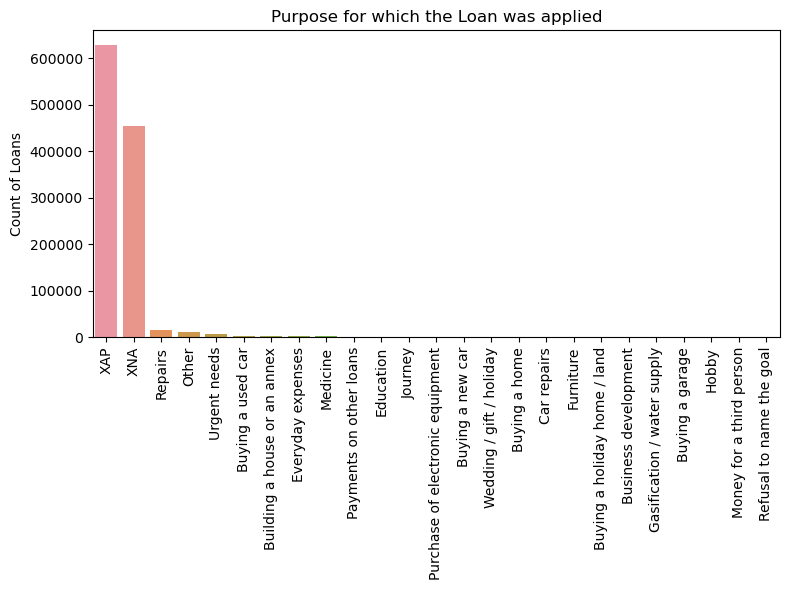

In [16]:
name_cash_loan_purpose_counts = prev_app_merge['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=False)

# Create a bar plot
plt.figure(figsize=(8, 6), tight_layout=True)
sns.barplot(x=name_cash_loan_purpose_counts.index, y=name_cash_loan_purpose_counts.values)

# Set plot labels and title
plt.ylabel("Count of Loans")
plt.title("Purpose for which the Loan was applied")
plt.xticks(rotation=90)

# Show the plot
plt.show()

- The purpose for most of the Loan Applications is XAP, which is followed by XNA.

### Univariate Analysis: Name_Contract_Status

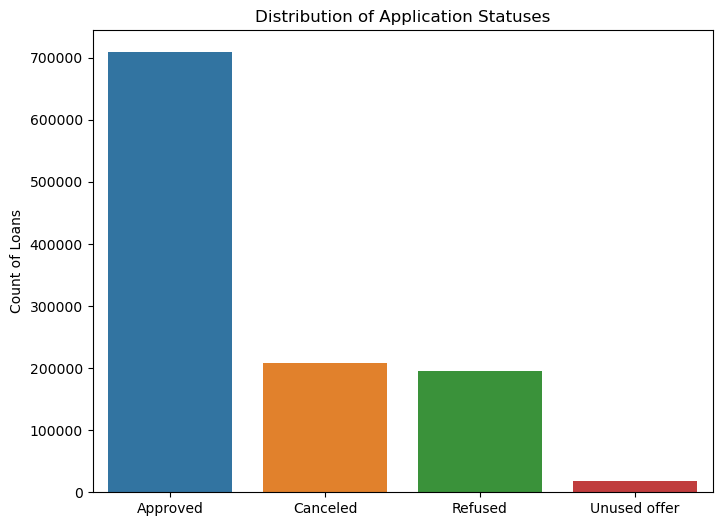

In [17]:
name_contract_status_counts = prev_app_merge['NAME_CONTRACT_STATUS'].value_counts(normalize=False)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=name_contract_status_counts.index, y=name_contract_status_counts.values)

# Set plot labels and title
plt.ylabel("Count of Loans")
plt.title("Distribution of Application Statuses")

# Show the plot
plt.show()

- Most of the previous applications for the clients were approved.
- This is followed by applications that were cancelled and refused.
- There were very few applications that were approved but the loans were unused by the applicant.

### Univariate Analysis: Name_Payment_Type

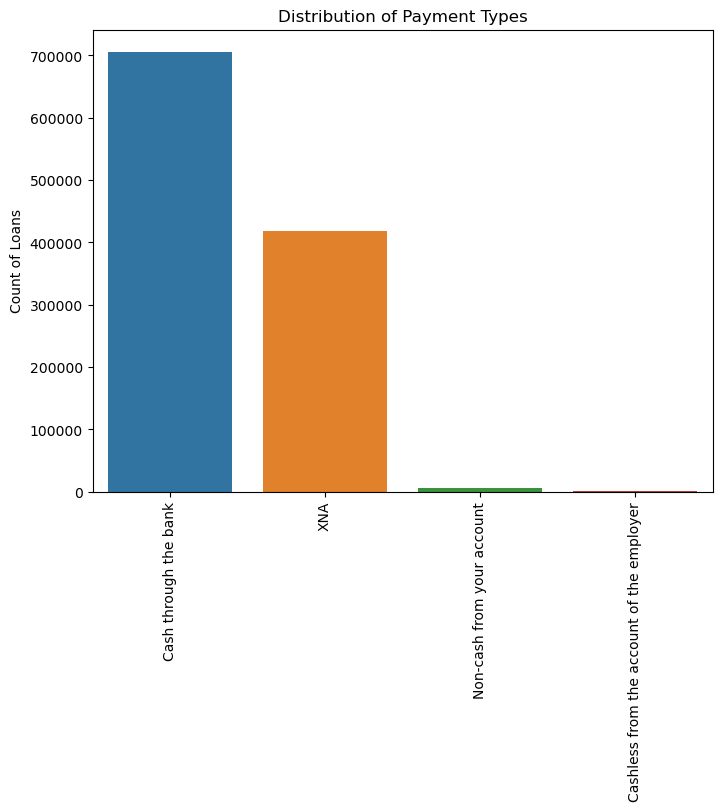

In [18]:
name_payment_type_counts = prev_app_merge['NAME_PAYMENT_TYPE'].value_counts(normalize=False)

# Create a bar plot
plt.figure(figsize=(8, 6),)
sns.barplot(x=name_payment_type_counts.index, y=name_payment_type_counts.values)
# Set plot labels and title
plt.ylabel("Count of Loans")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=90)

# Show the plot
plt.show()

- The Payment Type basically refers to the Payment Method that the client chose to pay for the previous application, and as we can see here, most of the clients chose to pay via Cash through the Bank for the same.
- This is followed by people whose payment type is XNA.

### Univariate Analysis: Code_Reject_Reason

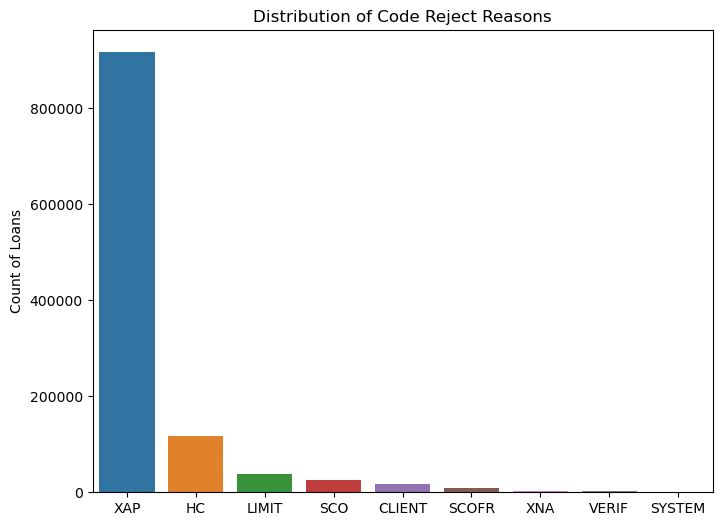

In [19]:
code_reject_reason_counts = prev_app_merge['CODE_REJECT_REASON'].value_counts(normalize=False)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=code_reject_reason_counts.index, y=code_reject_reason_counts.values)
# Set plot labels and title
plt.ylabel("Count of Loans")
plt.title("Distribution of Code Reject Reasons")


# Show the plot
plt.show()

- In most of the cases XAP, was the reason provided. (Not Applicable)
- This is followed by HC as the second most prominent reason.

### Univariate Analysis: Name_Client_Type

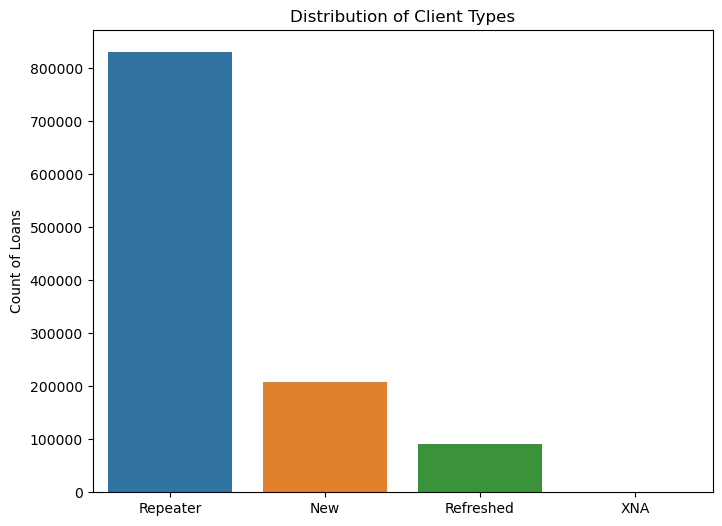

In [20]:
name_client_type_counts = prev_app_merge['NAME_CLIENT_TYPE'].value_counts(normalize=False)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=name_client_type_counts.index, y=name_client_type_counts.values)
# Set plot labels and title
plt.ylabel("Count of Loans")
plt.title("Distribution of Client Types")


# Show the plot
plt.show()

- This particular column defines whether the client was old or new when he/she was applying for the previous application. We can see from here that most of the applicants for the previous application were repeaters and there were very few first time applicants.

### Univariate Analysis: Name_Goods_Category

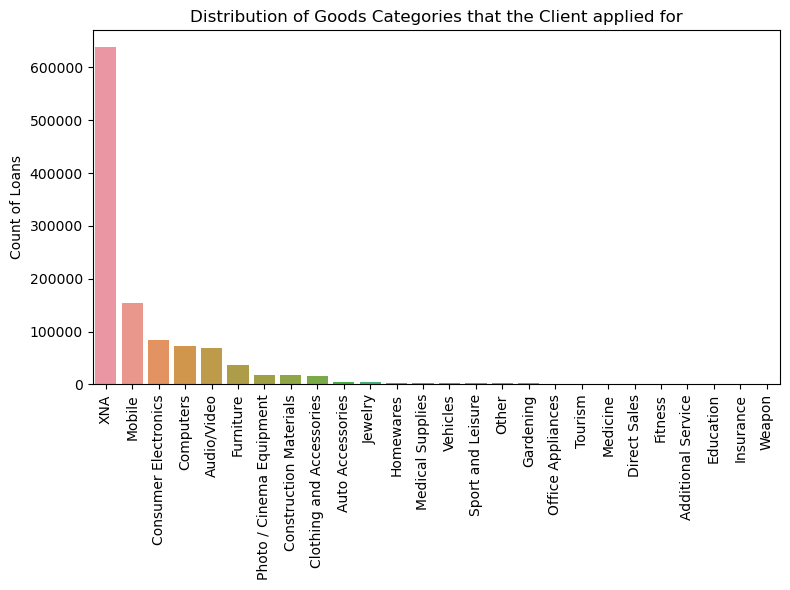

In [21]:
name_goods_category_counts = prev_app_merge['NAME_GOODS_CATEGORY'].value_counts(normalize=False)

# Create a bar plot
plt.figure(figsize=(8, 6), tight_layout=True)
sns.barplot(x=name_goods_category_counts.index, y=name_goods_category_counts.values)
# Set plot labels and title
plt.ylabel("Count of Loans")
plt.title("Distribution of Goods Categories that the Client applied for")
plt.xticks(rotation=90)

# Show the plot
plt.show()

- This defines the kind of goods that the client applied for in the previous application, and as can be seen, XNA is the most popular goods category followed by Mobiles.

### Univariate Analysis: Name_Portfolio

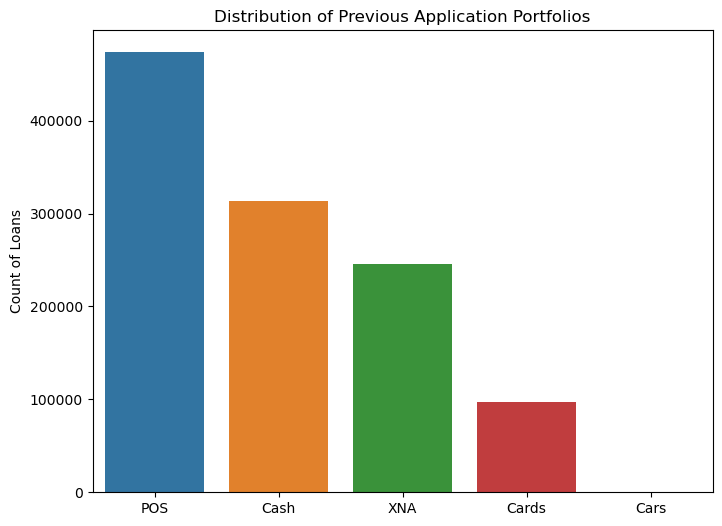

In [22]:
name_portfolio_counts = prev_app_merge['NAME_PORTFOLIO'].value_counts(normalize=False)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=name_portfolio_counts.index, y=name_portfolio_counts.values)  
# Set plot labels and title
plt.ylabel("Count of Loans")
plt.title("Distribution of Previous Application Portfolios")

# Show the plot
plt.show()

- This shows that most of the previous applications were for POS, which is followed by Cash and XNA.

### Univariate Analysis: Channel_Type

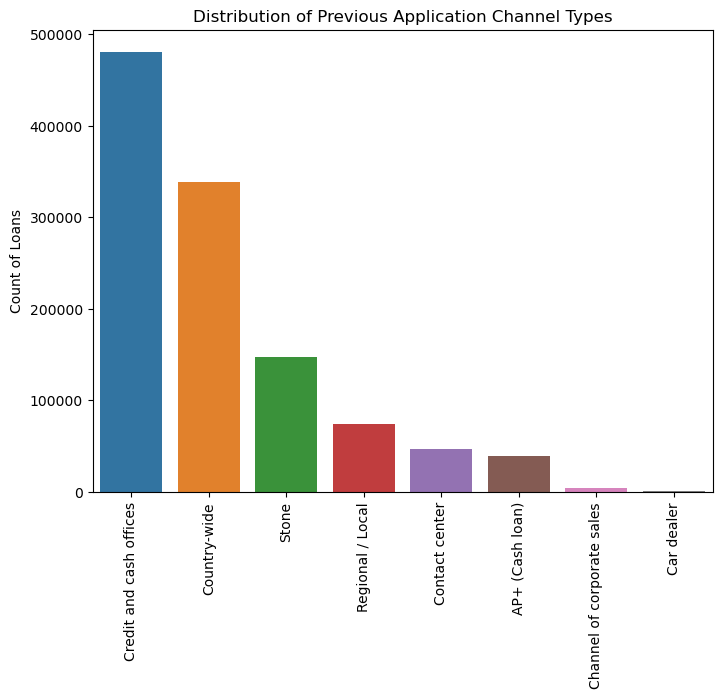

In [23]:
channel_type_counts = prev_app_merge['CHANNEL_TYPE'].value_counts(normalize=False)

# Create a bar plot
plt.figure(figsize=(8, 6))
# plt.bar(x=channel_type_counts.index, height=channel_type_counts.values, color='blue')
sns.barplot(x=channel_type_counts.index, y=channel_type_counts.values)
# Set plot labels and title
plt.ylabel("Count of Loans")
plt.title("Distribution of Previous Application Channel Types")
plt.xticks(rotation=90)


# Show the plot
plt.show()

### Univariate Analysis: Nflag_Insured_on_Approval

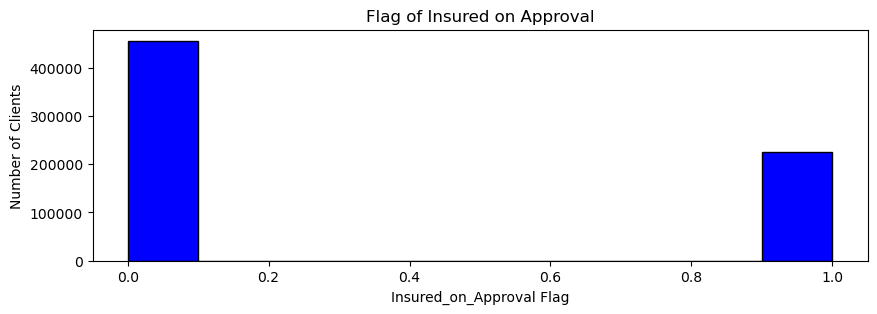

In [24]:
plt.figure(figsize=(10,3))
plt.hist(prev_app_merge['NFLAG_INSURED_ON_APPROVAL'].values, bins=10, \
         edgecolor='black', color='blue')
plt.title('Flag of Insured on Approval')
plt.xlabel('Insured_on_Approval Flag')
plt.ylabel('Number of Clients')
plt.show()


- There are much fewer clients who applied for Insurance in the previous application as compared to the number of clients who did not apply for insurance.

## Bivariate Analysis

### Bivariate Analysis: DAYS_DECISION vs DEFAULTER (TARGET=1)

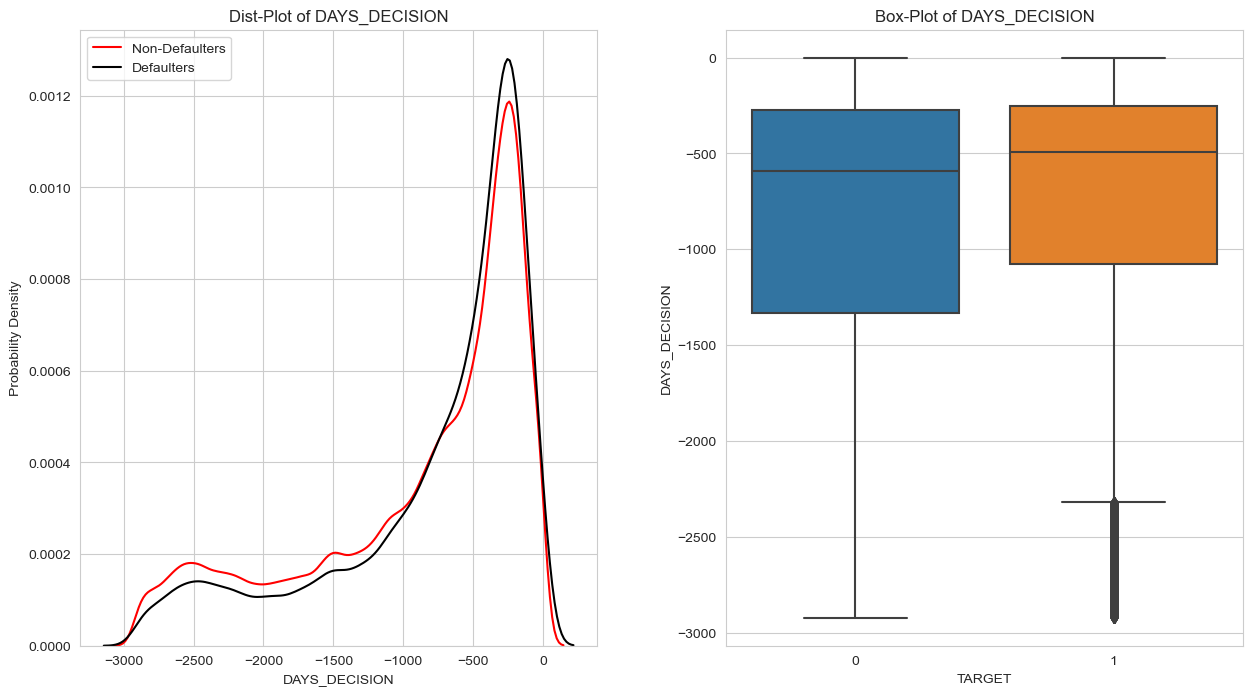

In [25]:
plot_continuous_variables(prev_app_merge, 'DAYS_DECISION', plots = ['distplot', 'box'], figsize = (15,8))

- From the above plot, we notice that for Defaulters, the number of days back when the decision was made is a bit lesser than that for Non-Defaulters. This implies that the Defaulters usually had the decision on their previous applications made more recently as compared to Non-Defaulters.

### Bivariate Analysis: DAYS_FIRST_DRAWING vs DEFAULTER (TARGET=1)

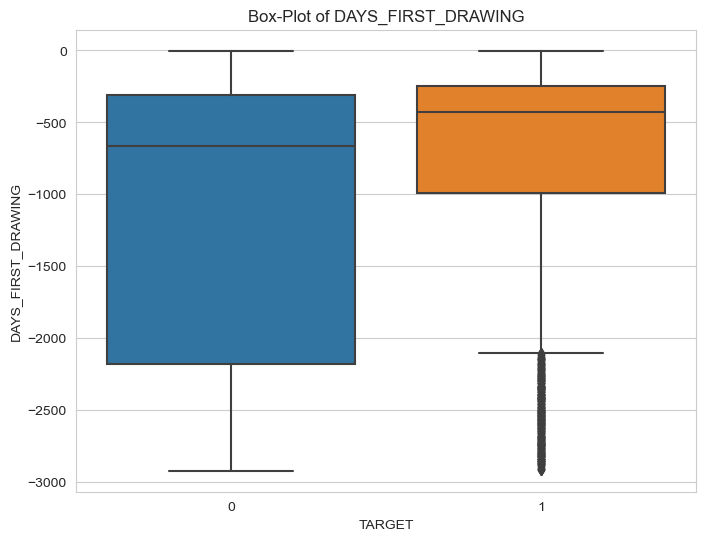

----------------------------------------------------------------------------------------------------


In [26]:
#print_percentiles(prev_app_merge, 'DAYS_FIRST_DRAWING', percentiles = list(range(0,11)) + list(range(20,101,20)))
plot_continuous_variables(prev_app_merge, 'DAYS_FIRST_DRAWING', plots = ['box'], figsize = (8,6), scale_limits = [-3000,0])
print('-'*100)

- Looking at the percentile values of DAYS_FIRST_DRAWING, it seems like most of the values are erroneous, starting from 7th percentile values itself. These erroneous values will needed to be dopped.
- If we try to analyze the distribution of this column by removing the erroneous ponts, we see that most of the Defaulters had their First Drawing on previous credit more recently as compared to Non-Defaulters. The 75th percentile value for Defaulters is also significantly lesser than that of Non-Defaulters.

### Bivariate Analysis: PRODUCT_COMBINATION 

Total Number of unique categories of PRODUCT_COMBINATION = 18


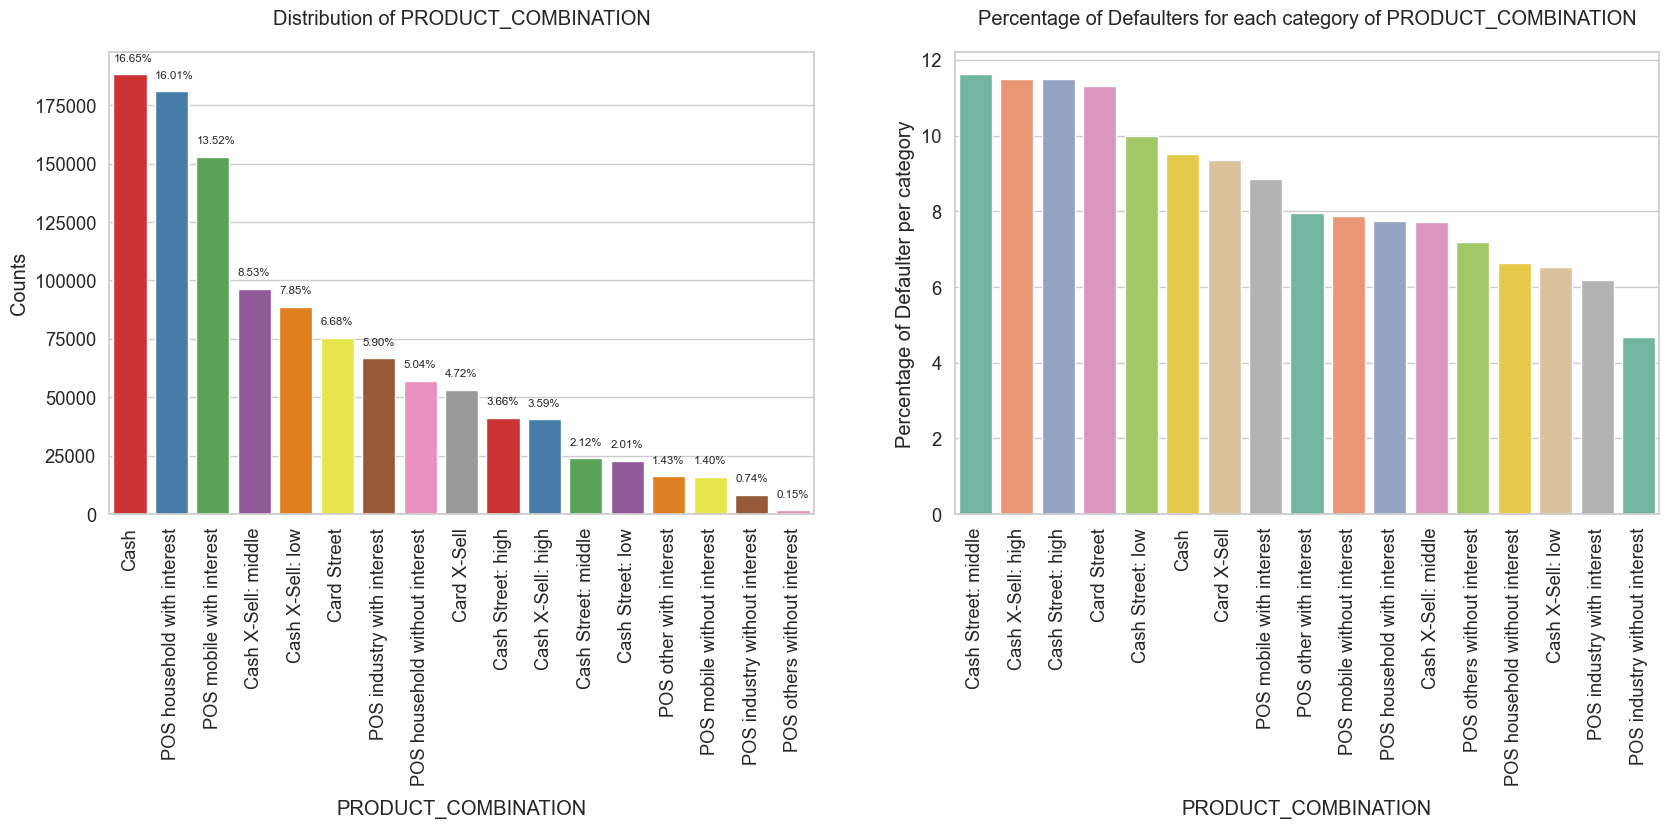

----------------------------------------------------------------------------------------------------


In [27]:
#let us first see the unique categories of 'PRODUCT_COMBINATION'
#print_unique_categories(prev_app_merge, 'PRODUCT_COMBINATION')

# plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_app_merge, 'PRODUCT_COMBINATION', rotation = 90, figsize = (20, 6))
print('-'*100)